# 2 Model Train
- 使用CV方法做训练

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data_add_train_5s.json"

def load_data(data_path):
    """Loads training dataset from json file
    
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)
        
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets(test_size, validation_size):
    
    # load data
    X, y = load_data(DATA_PATH)
    
    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    
    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = validation_size)
    
    return (X_train, X_validation, X_test, y_train, y_validation, y_test)

def build_model(input_shape):
    """
    Generates RNN-LSTM model
    
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """
    
    # create model
    model = keras.Sequential()
    
    # 3 LSTM layers
    model.add(keras.layers.LSTM(512, input_shape = input_shape, return_sequences = True))
    model.add(keras.layers.LSTM(256))
    
    # dense layers
    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
    # dense layers
    model.add(keras.layers.Dense(16, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
    
    # output layer
    model.add(keras.layers.Dense(2, activation = 'softmax'))
    
    return model
    
    
def plot_history(history):
    
    fig, axs = plt.subplots(2)
    plt.figure(dpi=450)
    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc = "lower right")
    axs[0].set_title("Accuracy eval")
    
    # create accuracy subplot
    axs[1].plot(history.history["loss"], label = "train error")
    axs[1].plot(history.history["val_loss"], label = "test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc = "upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
    
def predict(model, X, y):
    
    X = X[np.newaxis, ...]
    
    # prediction = [ [0.1, 0.2, ...]]
    prediction = model.predict(X) # X -> (1, 130, 13, 1)
    
    # extract index with max value
    predicted_index = np.argmax(prediction, axis = 1) #[4]
    print("Expected index: {}, Predicted index: {}".format(y,  predicted_index))

2024-12-07 22:10:52.329279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-07 22:10:52.387894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-07 22:10:52.388241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-07 22:10:52.390808: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 44, 512)           1077248   
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 3

2024-12-07 22:10:57.189347: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101
2024-12-07 22:10:59.133942: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1722/1722 [==============================] - 42s 21ms/step - loss: 0.1724 - accuracy: 0.9394 - val_loss: 0.0637 - val_accuracy: 0.9813
Epoch 2/20
1722/1722 [==============================] - 36s 21ms/step - loss: 0.0647 - accuracy: 0.9825 - val_loss: 0.0342 - val_accuracy: 0.9889
Epoch 3/20
1722/1722 [==============================] - 36s 21ms/step - loss: 0.0431 - accuracy: 0.9879 - val_loss: 0.0220 - val_accuracy: 0.9925
Epoch 4/20
1722/1722 [==============================] - 35s 20ms/step - loss: 0.0333 - accuracy: 0.9912 - val_loss: 0.0180 - val_accuracy: 0.9935
Epoch 5/20
1722/1722 [==============================] - 33s 19ms/step - loss: 0.0284 - accuracy: 0.9924 - val_loss: 0.0163 - val_accuracy: 0.9935
Epoch 6/20
1722/1722 [==============================] - 35s 20ms/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.0164 - val_accuracy: 0.9942
Epoch 7/20
1722/1722 [==============================] - 35s 20ms/step - loss: 0.0191 - accuracy: 0.9950 - val_loss: 0.0164 - val_accura

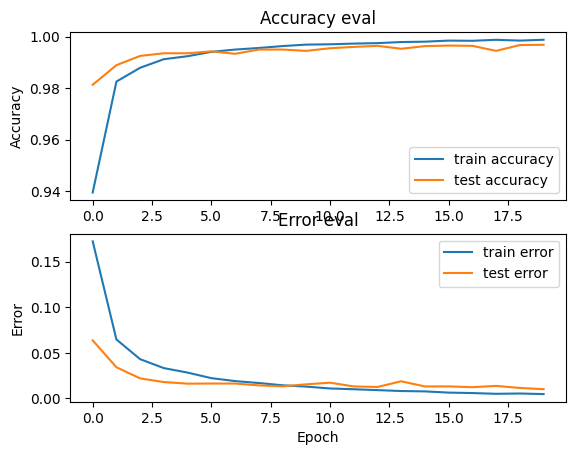

<Figure size 2880x2160 with 0 Axes>

In [2]:
if __name__ == "__main__":
    
    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.05, 0.15)
    
    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)
    
    # compile the network
    optimizer = keras.optimizers.Adam(learning_rate = 0.00001)
    model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
    model.summary()
    
    # train the RNN-LSTM
    history = model.fit(X_train, y_train, validation_data = (X_validation, y_validation), batch_size = 32, epochs = 20)
    
    # evaluate the RNN-LSTM on the test set
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose = 1)
    print("Accuracy on test set is: {}".format(test_accuracy))
    
    # make prediction on a sample
    X = X_test[0]
    y = y_test[0]

    predict(model, X, y)
    
    # plot accuracy and error over the epochs
    plot_history(history)

In [6]:
# model.save('02_model/1205_5s_50e.h5')
# model=keras.models.load_model('02_model/1205_5s.h5'

In [2]:
model=keras.models.load_model('02_model/1205_5s_50e.h5')

2024-12-07 22:23:35.113776: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-07 22:23:35.172905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-07 22:23:35.173449: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-07 22:23:35.175573: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [4]:
X_test_pre = model.predict(X_test)
y_pre = np.argmax(X_test_pre, axis = 1)

import sklearn.metrics as sm
matrixes = sm.confusion_matrix(y_test, y_pre)
print(matrixes)
report = sm.classification_report(y_test, y_pre)
print(report)

[[2989    8]
 [   8  407]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2997
           1       0.98      0.98      0.98       415

    accuracy                           1.00      3412
   macro avg       0.99      0.99      0.99      3412
weighted avg       1.00      1.00      1.00      3412



In [5]:
# X_dev, y_dev = load_data("data_add_5s.json")
# y_dev_pre = np.argmax(model.predict(X_dev), axis = 1)
# matrixes = sm.confusion_matrix(y_dev, y_dev_pre)
# print(matrixes)
# report = sm.classification_report(y_dev, y_dev_pre)
# print(report)

[[65037   415]
 [  244  6089]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     65452
           1       0.94      0.96      0.95      6333

    accuracy                           0.99     71785
   macro avg       0.97      0.98      0.97     71785
weighted avg       0.99      0.99      0.99     71785



In [ ]:
import sklearn.metrics as sm
X_test, y_test = load_data("data_add_test.json")
y_pre_prob = model.predict(X_test)
y_test_pre = np.argmax(y_pre_prob, axis = 1)
y_pre_c = [0 if x > y - 0.9999999 else 1 for x, y in y_pre_prob]
matrixes = sm.confusion_matrix(y_test, y_test_pre)
print(matrixes)
report = sm.classification_report(y_test, y_test_pre)
print(report)

In [ ]:
matrixes = sm.confusion_matrix(y_test, y_pre_c)
print(matrixes)
report = sm.classification_report(y_test, y_pre_c)
print(report)

In [8]:
test_error, test_accuracy = model.evaluate(X_dev, y_dev, verbose = 1)
print("Accuracy on dev set is: {}".format(test_accuracy))

2244/2244 [==============================] - 18s 8ms/step - loss: 0.0758 - accuracy: 0.9929
Accuracy on dev set is: 0.9928954243659973


AUC for the testing set : 0.9986263095890402


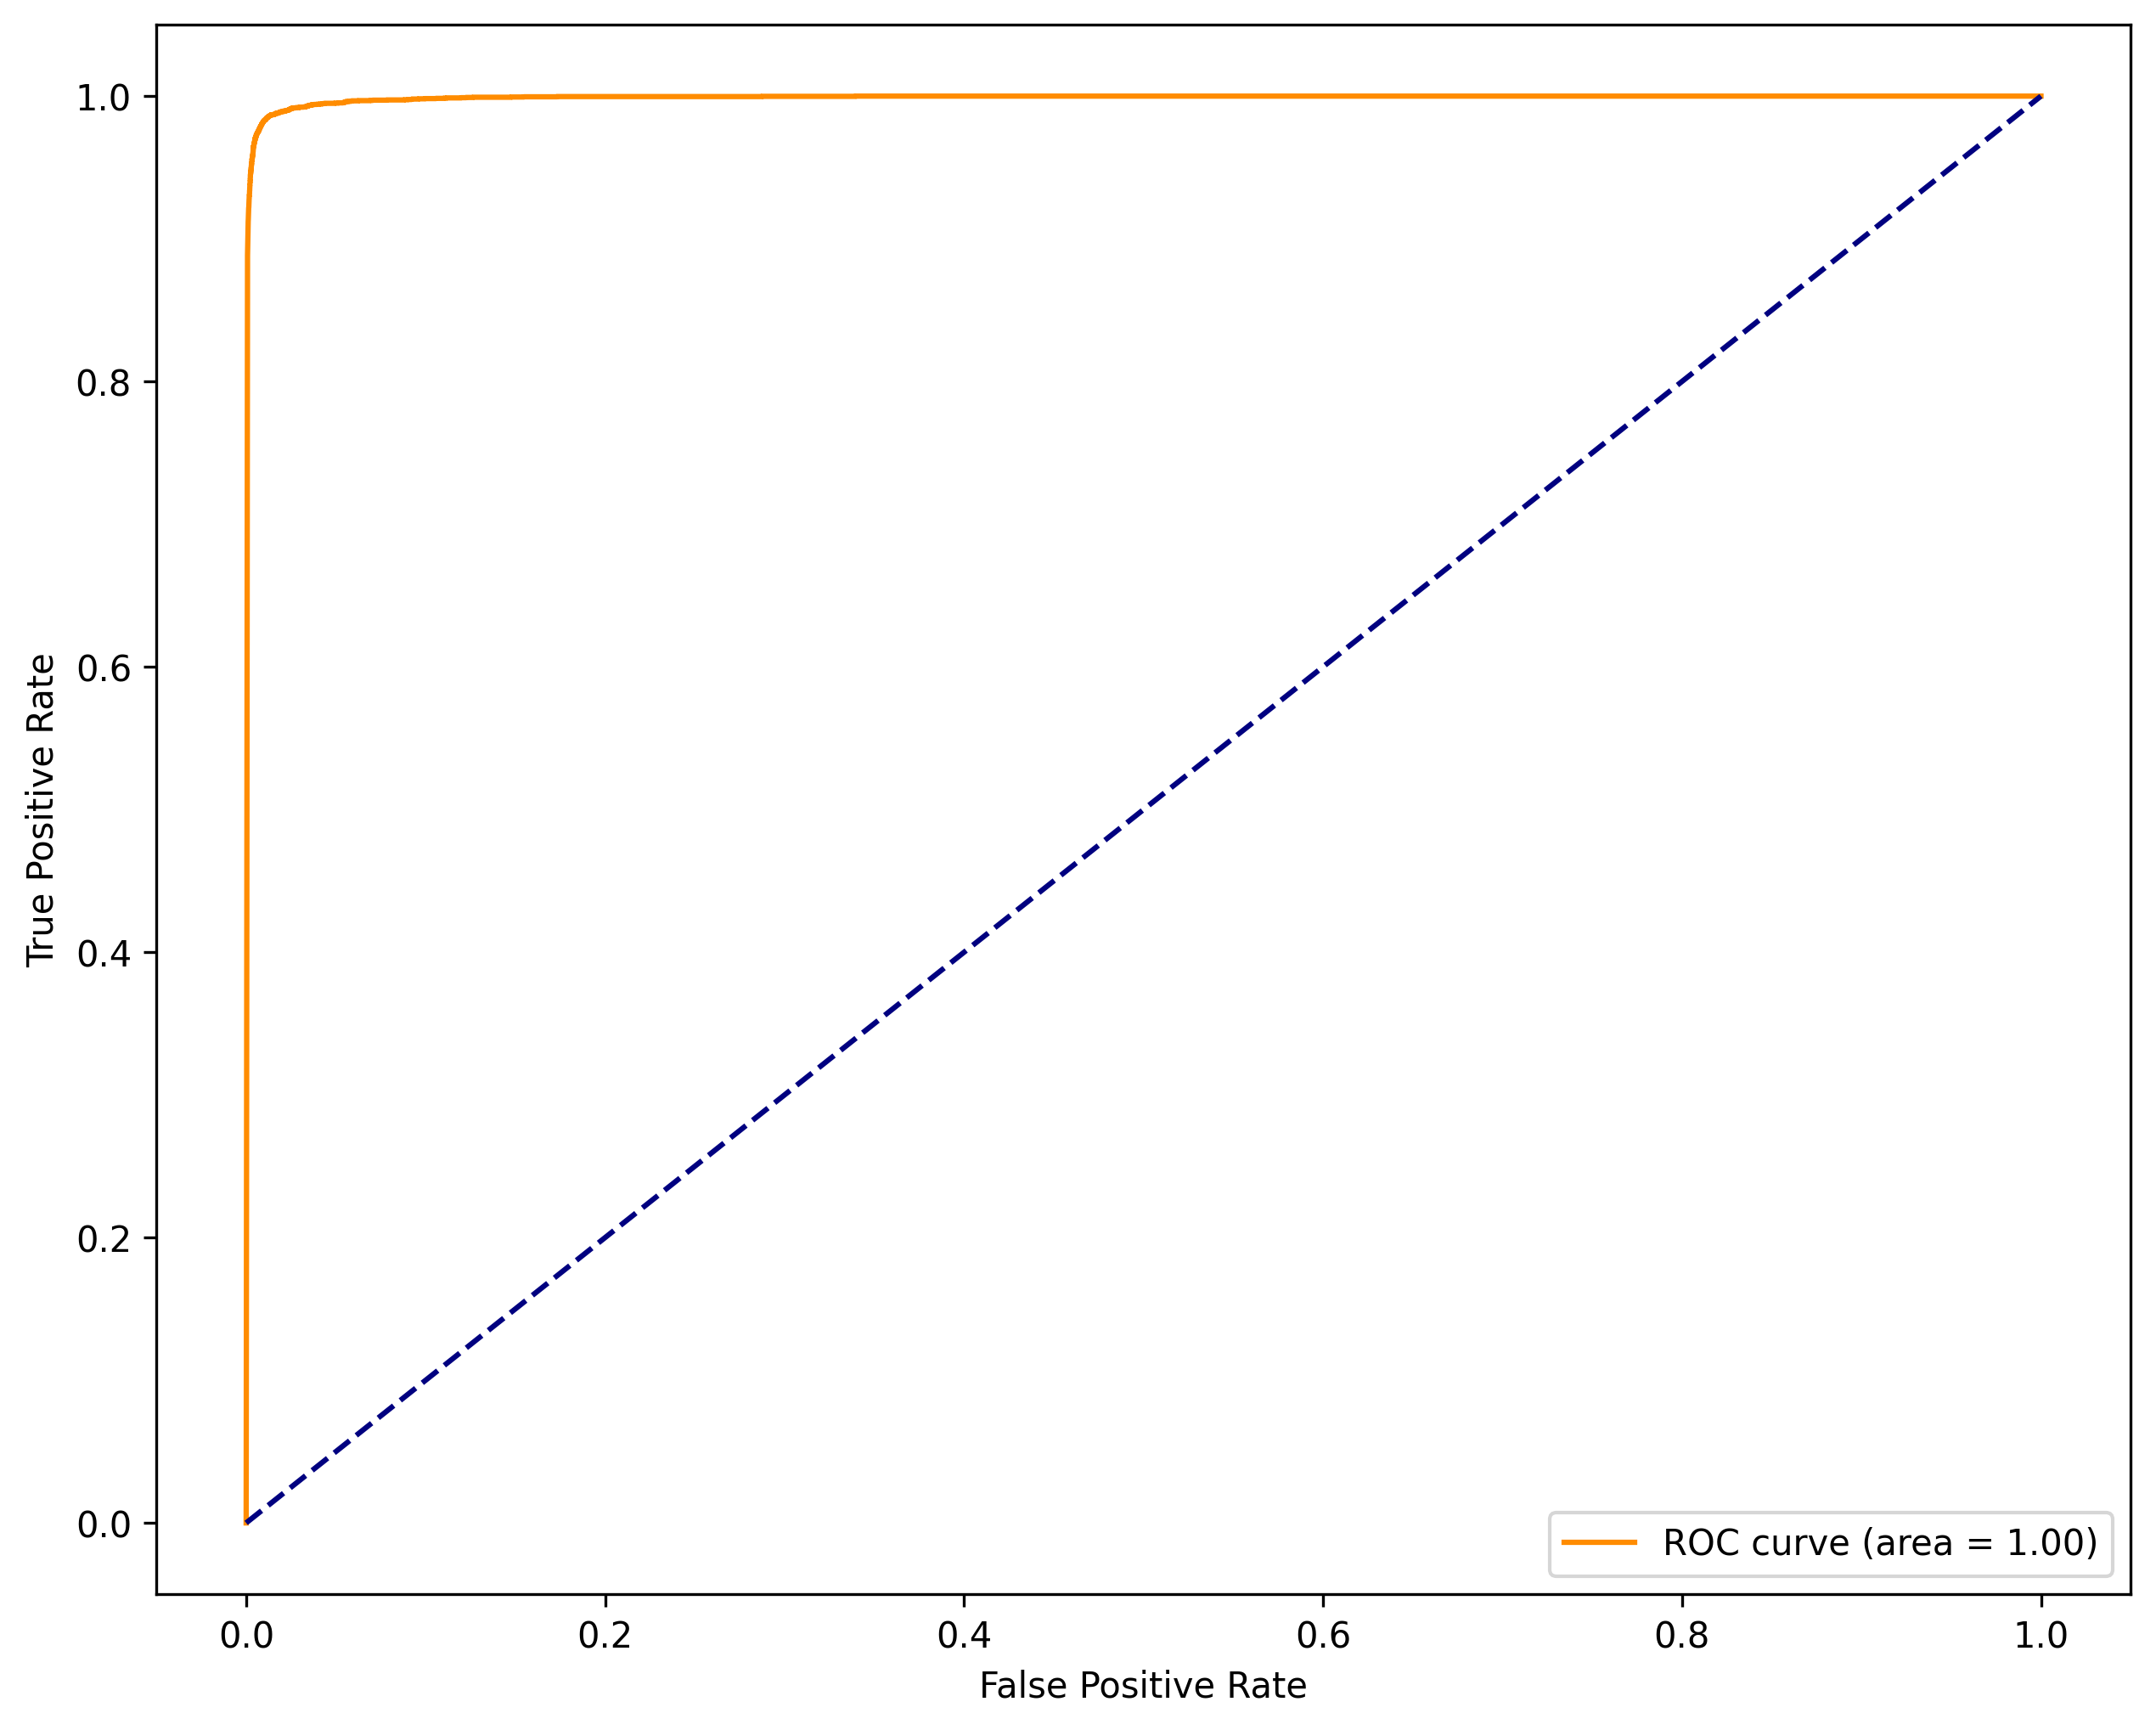

In [9]:
# from scipy.special import softmax
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_dev, y_dev_pre_prob[:, 1]) 
roc_auc = auc(fpr, tpr)
print("AUC for the testing set :", roc_auc)  # 输出AUC值
# 绘制ROC曲线
plt.figure(dpi=300, figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()